## Name: Oko Alexander Kenechukwu

### Lab - Machine Learning
In this notebook, you will use the Gaussian Naive Bayes estimator to perform and evaluate a binary classification.  You will also compare the performance of this algorithm to other classification algoritms.

This is the Breast Cancer Wisconsin Diagnostic dataset that is bundled with scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

The dataset contains 569 samples, each with 30 features and a label indicating whether a tumor was malignant (0) or benign (1). There are only two labels, so this dataset is commonly used to perform binary classification. 

Using this dataset, reimplement the steps of this chapter’s classification case study in Sections 15.2–15.3.
* Use the GaussianNB (short for Gaussian Naive Bayes) estimator. 
* When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a LogisticRegression classifier in the estimators dictionary.
  

**Implement the following steps/tasks. Clearly document each step with markup descriptions. (HINT: look at the steps in the book from 15.2.2-15.3.3)**
* Load the data
* Display the data description
* Check the sample and target sizes
* Split the data for training and testing
* Create the model (GaussianNB)
* Train the model
* Predict
* Determine accuracy with score
* Determine accuracy with confusion matrix.  
* Visualize the confusion matrix using a heat map
* Determine accuracy with classification report
* Perform k-fold cross validation
* Run multiple models using a dictionary of esitmators and a for loop to find the best one, include GaussianNB, KNeighborsClassifier, LogisticRegression, and SVC.
* Which classifer performs the best?







In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [30]:
data.target[[10,50,85]]

array([0, 1, 0])

In [40]:
data.target_names[1]
#hence, 0 is malignant, 1 is benign

'benign'

In [44]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [60]:
print("Sample size is: ", data.data.shape[0])

Sample size is:  569


In [62]:
print("Sample target size is: ", data.target.shape[0])

Sample target size is:  569


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(data.data, data.target, random_state=11)
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)

X_train shape is:  (426, 30)
X_test shape is:  (143, 30)


In [72]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)


GaussianNB()

In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [144]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)
kfold = KFold(n_splits=2, shuffle=True, random_state=42)
scores= cross_val_score(estimator= gnb, X=data.data, y=data.target, cv= kfold)


In [140]:
print(f'{gnb.score(X_test, y_test):.2%}')
print(f'{gnb.score(data.data, data.target):.2%}')

95.10%
94.02%


In [96]:
from sklearn.metrics import confusion_matrix
predicted= gnb.predict(X= X_test)
expected= y_test
confusion= confusion_matrix(y_true=expected, y_pred= predicted)
confusion

array([[44,  6],
       [ 1, 92]], dtype=int64)

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
confusion_df = pd.DataFrame(confusion,index=['Malignant', 'Benign'], columns=['Malignant', 'Benign'])

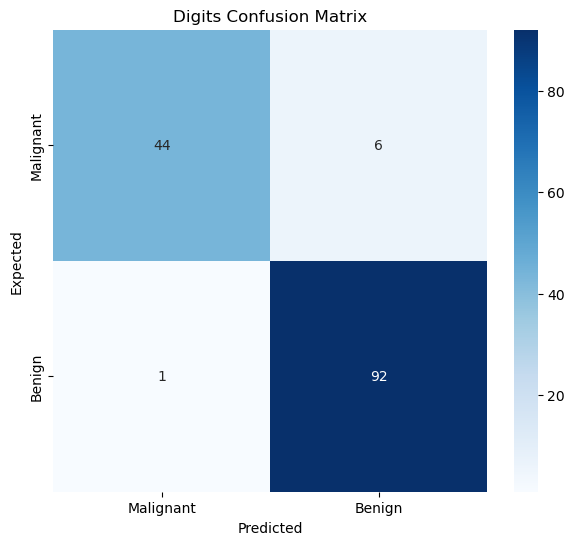

In [124]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='Blues') 

# Augmented parts
axes.set(xlabel='Predicted', ylabel='Expected', title='Digits Confusion Matrix')
plt.show()

In [126]:
from sklearn.metrics import classification_report

In [130]:
names = [str(name) for name in data.target_names]
names

['malignant', 'benign']

In [132]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [146]:
#Using cross validation score
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.94385965 0.93661972]


In [150]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [158]:
estimators = {
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2), 
     'SVC': SVC(),
    'GaussianNB': gnb,
    'LogisticRegression': LogisticRegression(max_iter=5000)
    }

In [160]:
estimators

{'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'SVC': SVC(),
 'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(max_iter=5000)}

In [162]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=2, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=data.data, y=data.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=90.16%; standard deviation=1.04%
                 SVC: mean accuracy=91.21%; standard deviation=0.34%
          GaussianNB: mean accuracy=94.02%; standard deviation=0.01%
  LogisticRegression: mean accuracy=94.90%; standard deviation=0.54%


## The Logistic Regression estimator does the best